## Importing libraries and observe input folders in Kaggle notebook

In [ ]:
# Linear algebra
import numpy as np

# Data processing, CSV file I/O (e.g. pd.read_csv)
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import nltk
import subprocess
import re
from nltk.corpus import wordnet
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
cd /content/drive/MyDrive/Machine learning 2024/Notebooks - Machine Learning/Generic Projects/Fake news classification

/content/drive/MyDrive/Machine learning 2024/Notebooks - Machine Learning/Generic Projects/Fake news classification


### Read WELFake_Dataset.csv from kaggle/input

In [ ]:
# Select the 5000 from 0 and 5000 from 1 rows using the label columns

import pandas as pd
df = pd.read_csv('WELFake_Dataset.csv')
df_0 = df[df['label'] == 0].sample(5000)
df_1 = df[df['label'] == 1].sample(5000)
df = pd.concat([df_0, df_1])


In [ ]:
df.head()

,Unnamed: 0,title,text,label
54088,54088,Trump to receive first security briefing: sources,WASHINGTON (Reuters) - Republican presidential...,0
29985,29985,EU congratulates Austria's Kurz but uneasy abo...,LUXEMBOURG/BRUSSELS (Reuters) - European Union...,0
35984,35984,A new 50-state poll shows exactly why Clinton ...,"With nine weeks until Election Day, Donald Tru...",0
47353,47353,Trump team struggles for cohesion on tougher C...,WASHINGTON (Reuters) - The incoming U.S. admin...,0
48484,48484,’Angel’ Dad: ’Trump Is Not Wasting Any Time’ o...,The father of a man who was brutally shot and ...,0


### EDA(Exploratory Data Analysis)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 54088 to 63006
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  10000 non-null  int64 
 1   title       9903 non-null   object
 2   text        9997 non-null   object
 3   label       10000 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 390.6+ KB


### Missing data analysis

In [ ]:
# Missing data analysis
df.isnull().sum()

,0
Unnamed: 0,0
title,97
text,3
label,0


In [ ]:
# Drop NA values
df = df.dropna()

# Missing data analysis again
df.isnull().sum()

,0
Unnamed: 0,0
title,0
text,0
label,0


### Drop unused columns

In [ ]:
df.drop(columns=['Unnamed: 0'],inplace=True)
df.head()

<ipython-input-25-6a259306abd0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=['Unnamed: 0'],inplace=True)


,title,text,label
54088,Trump to receive first security briefing: sources,WASHINGTON (Reuters) - Republican presidential...,0
29985,EU congratulates Austria's Kurz but uneasy abo...,LUXEMBOURG/BRUSSELS (Reuters) - European Union...,0
35984,A new 50-state poll shows exactly why Clinton ...,"With nine weeks until Election Day, Donald Tru...",0
47353,Trump team struggles for cohesion on tougher C...,WASHINGTON (Reuters) - The incoming U.S. admin...,0
48484,’Angel’ Dad: ’Trump Is Not Wasting Any Time’ o...,The father of a man who was brutally shot and ...,0


### Class distribution

<Axes: ylabel='count'>

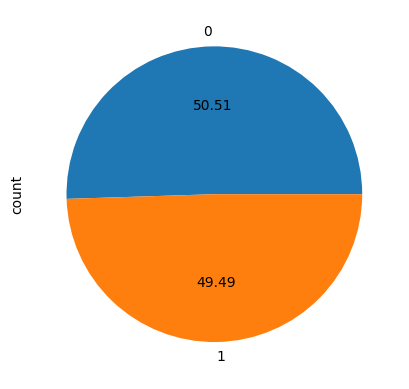

In [ ]:
# Class distribution
# 0 - Fake, 1 - Real
df['label'].value_counts().plot.pie(autopct='%.2f')

**From the graph we understand that we have balanced data.**

### Define X and y variables

In [ ]:
X = df.drop(columns=['label'])
y = df['label']

In [ ]:
messages = X.copy()

# We have to reset index as we have used dropna() earlier, otherwise it will throw an error
messages.reset_index(inplace=True)

### Lemmatization

In [ ]:
import re
from nltk.corpus import stopwords # “the,” “and,” “is,” “in,” “for,” “where,” “when,...
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer


# Initialize the lemmatizer and stemmer
lm = WordNetLemmatizer()
ps = PorterStemmer()

# Initialize an empty list to store the cleaned messages
corpus = []

# Loop through each message in the 'messages' list
for i in range(len(messages)):
    # Remove non-alphanumeric characters from the message title using regex
    review = re.sub('[^a-zA-Z0-9]', ' ', messages['text'][i])

    # Convert the message to lowercase
    review = review.lower()

    # Split the message into individual words
    review = review.split()

    # Lemmatize, stem each word, and remove stopwords
    review = [ps.stem(lm.lemmatize(x)) for x in review if x not in stopwords.words('english')]

    # Join the list of words back into a single string
    review = " ".join(review)

    # Append the cleaned message to the corpus list
    corpus.append(review)

In [ ]:
tf =TfidfVectorizer(max_features=5000, ngram_range=(1, 3))
X=tf.fit_transform(corpus).toarray()


**Explantion**

  Extract the top 5,000 most frequent terms (unigrams, bigrams, and trigrams combined).

  Compute the TF-IDF score for each term across all documents, which represents how important a word is to a document relative to the entire corpus.

  Output a sparse matrix where each row corresponds to a document, and each column corresponds to one of the top 5,000 features (terms), filled with the TF-IDF scores.

**max_features=5000:** This parameter limits the number of features (or terms) in the TF-IDF matrix to the top 5,000 most frequent terms in the entire corpus. This helps in reducing the dimensionality of the feature space and keeping the most relevant terms.

### Splitting into train and test sets

In [ ]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2,random_state=42,stratify=y)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(X_train,y_train)

RandomForestClassifier()

### Performance Metrics

In [ ]:
y_pred=rf.predict(X_test)

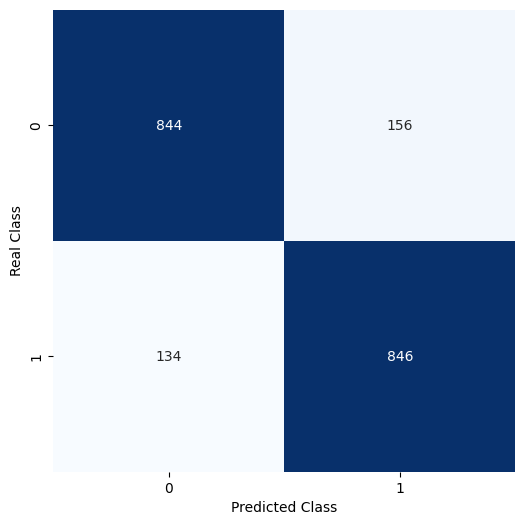

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Confusion matrix oluştur
cm = confusion_matrix(y_test, y_pred)

# Matrisi görselleştirme
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False, square=True)
plt.xlabel('Predicted Class')
plt.ylabel('Real Class')
plt.show()

Accuracy: 0.8671717171717171
Precision: 0.8707342295760083
Recall: 0.8591836734693877
F1 Score: 0.8649203903441192

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.88      0.87      1000
           1       0.87      0.86      0.86       980

    accuracy                           0.87      1980
   macro avg       0.87      0.87      0.87      1980
weighted avg       0.87      0.87      0.87      1980



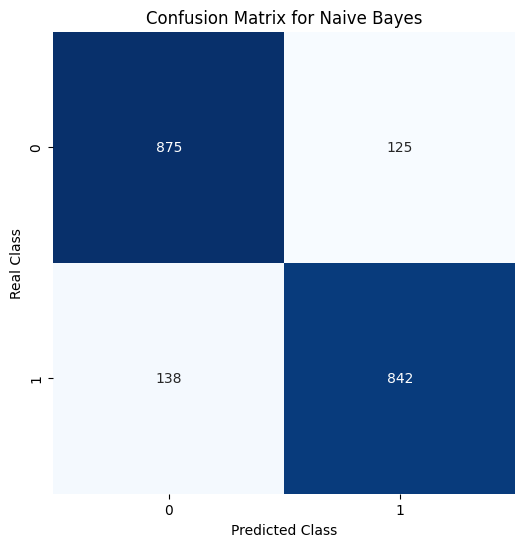

In [ ]:
# Apply Naivebayes with all results

import matplotlib.pyplot as plt
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Naive Bayes modelini oluştur
nb = MultinomialNB()

# Modeli eğit
nb.fit(X_train, y_train)

# Test verileri üzerinde tahmin yap
y_pred_nb = nb.predict(X_test)

# Performans metriklerini hesapla
accuracy = accuracy_score(y_test, y_pred_nb)
precision = precision_score(y_test, y_pred_nb)
recall = recall_score(y_test, y_pred_nb)
f1 = f1_score(y_test, y_pred_nb)

# Sonuçları yazdır
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

# Sınıflandırma raporunu yazdır
print("\nClassification Report:\n", classification_report(y_test, y_pred_nb))

# Confusion matrix oluştur
cm_nb = confusion_matrix(y_test, y_pred_nb)

# Matrisi görselleştirme
plt.figure(figsize=(8, 6))
sns.heatmap(cm_nb, annot=True, fmt="d", cmap="Blues", cbar=False, square=True)
plt.xlabel('Predicted Class')
plt.ylabel('Real Class')
plt.title('Confusion Matrix for Naive Bayes')
plt.show()


In [ ]:
# Apply all other models in one cell and also ensemble models

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, VotingClassifier
from xgboost import XGBClassifier

# Initialize models
logistic_regression = LogisticRegression()
svm = SVC()
knn = KNeighborsClassifier()
decision_tree = DecisionTreeClassifier()
gradient_boosting = GradientBoostingClassifier()
adaboost = AdaBoostClassifier()
xgboost = XGBClassifier()

# Fit models
logistic_regression.fit(X_train, y_train)
svm.fit(X_train, y_train)
knn.fit(X_train, y_train)
decision_tree.fit(X_train, y_train)
gradient_boosting.fit(X_train, y_train)
adaboost.fit(X_train, y_train)
xgboost.fit(X_train, y_train)

# Predictions
y_pred_lr = logistic_regression.predict(X_test)
y_pred_svm = svm.predict(X_test)
y_pred_knn = knn.predict(X_test)
y_pred_dt = decision_tree.predict(X_test)
y_pred_gb = gradient_boosting.predict(X_test)
y_pred_ada = adaboost.predict(X_test)
y_pred_xgb = xgboost.predict(X_test)

# Evaluate individual models
models = [logistic_regression, svm, knn, decision_tree, gradient_boosting, adaboost, xgboost]
model_names = ["Logistic Regression", "SVM", "KNN", "Decision Tree", "Gradient Boosting", "AdaBoost", "XGBoost"]

for model, name in zip(models, model_names):
    print(f"--- {name} ---")
    print("Accuracy:", accuracy_score(y_test, model.predict(X_test)))
    print("Precision:", precision_score(y_test, model.predict(X_test)))
    print("Recall:", recall_score(y_test, model.predict(X_test)))
    print("F1 Score:", f1_score(y_test, model.predict(X_test)))
    print("\n")

# Ensemble model (Voting Classifier)
ensemble = VotingClassifier(estimators=[
    ('lr', logistic_regression), ('svm', svm), ('knn', knn), ('dt', decision_tree),
    ('gb', gradient_boosting), ('ada', adaboost), ('xgb', xgboost)], voting='hard')
ensemble.fit(X_train, y_train)
y_pred_ensemble = ensemble.predict(X_test)

print("--- Ensemble (Voting Classifier) ---")
print("Accuracy:", accuracy_score(y_test, y_pred_ensemble))
print("Precision:", precision_score(y_test, y_pred_ensemble))
print("Recall:", recall_score(y_test, y_pred_ensemble))
print("F1 Score:", f1_score(y_test, y_pred_ensemble))


--- Logistic Regression ---
Accuracy: 0.8868686868686869
Precision: 0.8825910931174089
Recall: 0.889795918367347
F1 Score: 0.8861788617886179


--- SVM ---
Accuracy: 0.8888888888888888
Precision: 0.8815261044176707
Recall: 0.8959183673469387
F1 Score: 0.8886639676113359


--- KNN ---
Accuracy: 0.5358585858585858
Precision: 0.5160949868073879
Recall: 0.9979591836734694
F1 Score: 0.6803478260869565


--- Decision Tree ---
Accuracy: 0.8
Precision: 0.805439330543933
Recall: 0.7857142857142857
F1 Score: 0.7954545454545454


--- Gradient Boosting ---
Accuracy: 0.8090909090909091
Precision: 0.7559523809523809
Recall: 0.9071428571428571
F1 Score: 0.8246753246753247


--- AdaBoost ---
Accuracy: 0.7580808080808081
Precision: 0.6904942965779468
Recall: 0.926530612244898
F1 Score: 0.791285403050109


--- XGBoost ---
Accuracy: 0.851010101010101
Precision: 0.8328474246841594
Recall: 0.8744897959183674
F1 Score: 0.8531607765057243


--- Ensemble (Voting Classifier) ---
Accuracy: 0.85
Precision: 0.807

In [ ]:
# Apply stacking model

from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, VotingClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import MultinomialNB

logistic_regression = LogisticRegression()
knn = KNeighborsClassifier()
decision_tree = DecisionTreeClassifier()
logistic_regression = LogisticRegression()
svm = SVC()
knn = KNeighborsClassifier()
decision_tree = DecisionTreeClassifier()
gradient_boosting = GradientBoostingClassifier()
adaboost = AdaBoostClassifier()
xgboost = XGBClassifier()
nb = MultinomialNB()

# Define base models
base_models = [
    ('lr', logistic_regression),
    ('knn', knn),
    ('dt', decision_tree),
    ('gb', gradient_boosting),
    ('ada', adaboost),
    ('xgb', xgboost),
    ('nb',nb)
]

# Define meta-model
meta_model = LogisticRegression()

# Create stacking classifier
stacking_classifier = StackingClassifier(
    estimators=base_models,
    final_estimator=meta_model
)

# Fit the stacking classifier
stacking_classifier.fit(X_train, y_train)

# Make predictions
y_pred_stacking = stacking_classifier.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Evaluate the stacking model
print("--- Stacking Classifier ---")
print("Accuracy:", accuracy_score(y_test, y_pred_stacking))
print("Precision:", precision_score(y_test, y_pred_stacking))
print("Recall:", recall_score(y_test, y_pred_stacking))
print("F1 Score:", f1_score(y_test, y_pred_stacking))

--- Stacking Classifier ---
Accuracy: 0.8929292929292929
Precision: 0.8975155279503105
Recall: 0.8846938775510204
F1 Score: 0.8910585817060637
